In [56]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [57]:
EPOCHS = 3500
DIMS = (10, 5)

In [58]:
trainer_state = {}
with open("trainer_state.json", 'r') as file:
    trainer_state = json.load(file)
data_all = {}
with open("data_all.json", 'r') as file:
    data_all = json.load(file)

In [59]:
train_loss = []
eval_loss = []
for elem in trainer_state["log_history"]:
    if 'loss' in elem.keys():
        train_loss.append(elem['loss'])
    if 'eval_loss' in elem.keys():
        eval_loss.append(elem['eval_loss'])

In [60]:
train_loss = [train_loss[0]] + train_loss
eval_loss = [eval_loss[0] * 1.2] + eval_loss

In [61]:
training_epochs = np.linspace(0, EPOCHS, len(train_loss))
eval_epochs = np.linspace(0, EPOCHS, len(eval_loss))

In [62]:
print(f"{training_epochs.shape = }")
print(f"{len(train_loss) = }")
print(f"{eval_epochs.shape = }")
print(f"{len(eval_loss) = }")

training_epochs.shape = (3501,)
len(train_loss) = 3501
eval_epochs.shape = (101,)
len(eval_loss) = 101


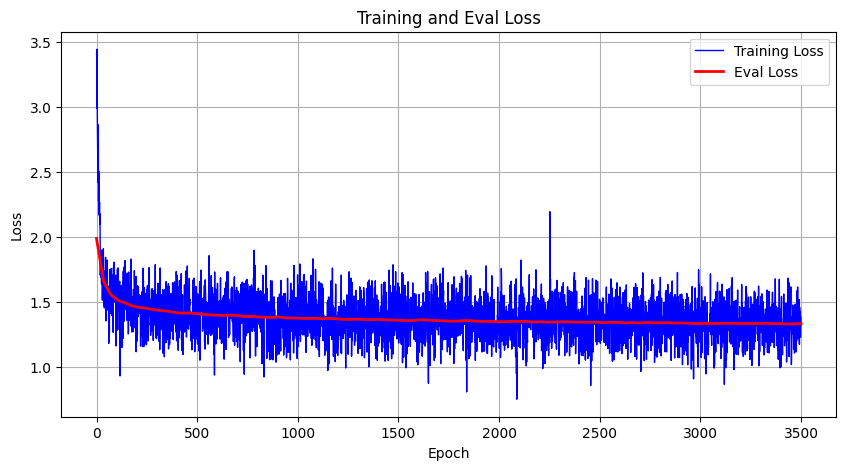

In [63]:
plt.figure(figsize=DIMS)
plt.plot(training_epochs, train_loss, label='Training Loss', color='blue', linewidth=1)
plt.plot(eval_epochs, eval_loss, label='Eval Loss', color='red', linewidth=2)
plt.title('Training and Eval Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('Graphs/Training Eval Loss Curve.png')
plt.show()

In [64]:
scores = data_all["scores"]
orders = data_all["orders"]
all_predictions = data_all["all_predictions"]

In [65]:
s = 0
for k  in all_predictions.keys():
    s += len(all_predictions[k])
s

7018

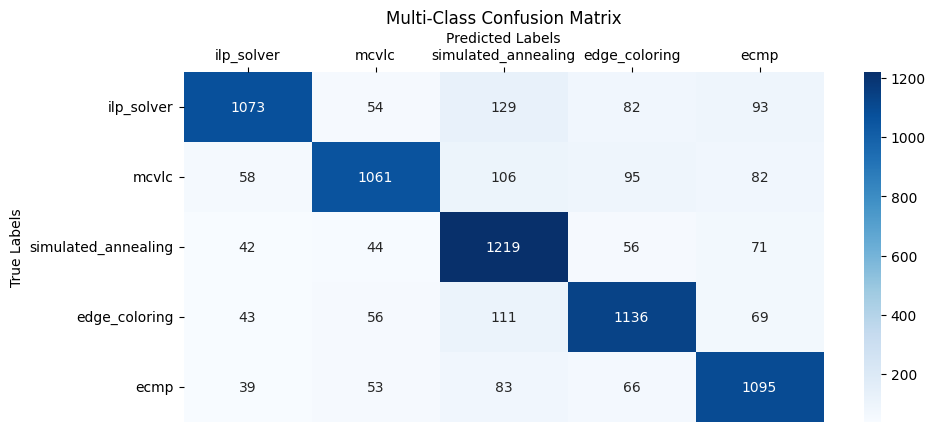

In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
i = len("flow_info_")
modified_predictions = {k[i:]: [v[i:] for v in values] for k, values in all_predictions.items()}
true_labels = []
pred_labels = []
for true_label, predictions in modified_predictions.items():
    true_labels.extend([true_label] * len(predictions))
    pred_labels.extend(predictions)
labels = list(modified_predictions.keys())
cm = confusion_matrix(true_labels, pred_labels, labels=labels)
plt.figure(figsize=DIMS)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multi-Class Confusion Matrix')
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.15)
plt.savefig('Graphs/Multi-Class Confusion Matrix.png', bbox_inches='tight')
plt.show()

In [67]:
print(f"flow_info_simulated_annealing: {set(all_predictions['flow_info_simulated_annealing'])}")
print(f"flow_info_ecmp: {set(all_predictions['flow_info_ecmp'])}")

flow_info_simulated_annealing: {'flow_info_mcvlc', 'flow_info_ecmp', 'flow_info_simulated_annealing', 'flow_info_ilp_solver', 'flow_info_edge_coloring'}
flow_info_ecmp: {'flow_info_mcvlc', 'flow_info_ecmp', 'flow_info_simulated_annealing', 'flow_info_ec2', 'flow_info_ilp_solver', 'flow_info_edge_coloring'}


In [68]:
sum(scores) / len(scores)

0.9559690503454443

In [69]:
num_ones = sum(1 for score in scores if score == 1.0)
accuracy = (num_ones / len(scores)) * 100
accuracy

86.99059561128527

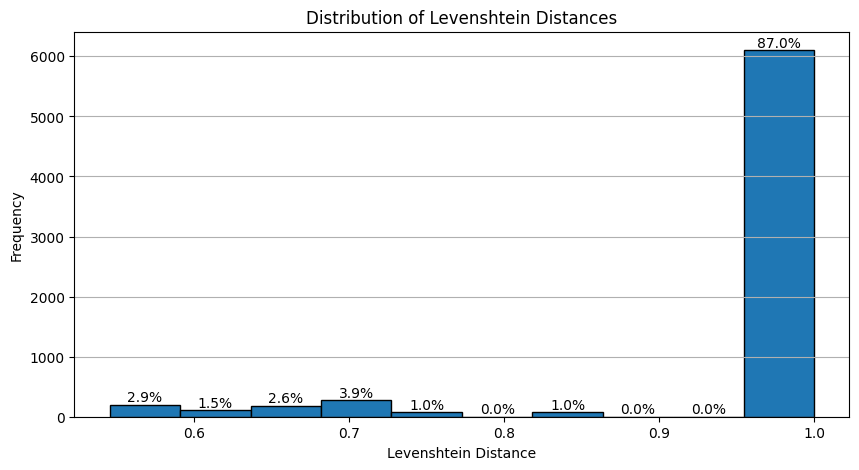

In [70]:
# Histogram
plt.figure(figsize=DIMS)
counts, bins, patches = plt.hist(scores, bins=10, edgecolor='black')
percentages = (counts / sum(counts)) * 100
for i in range(len(bins) - 1):
    if percentages[i] > 90:
        plt.text((bins[i] + bins[i+1]) / 2, counts[i], f'{percentages[i]:.1f}%', ha='center', va='top')
    else:
        plt.text((bins[i] + bins[i+1]) / 2, counts[i], f'{percentages[i]:.1f}%', ha='center', va='bottom')
plt.xlabel('Levenshtein Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Levenshtein Distances')
plt.grid(axis='y')
plt.savefig('Graphs/Distribution Of Levenshtein Distances.png')
plt.show()

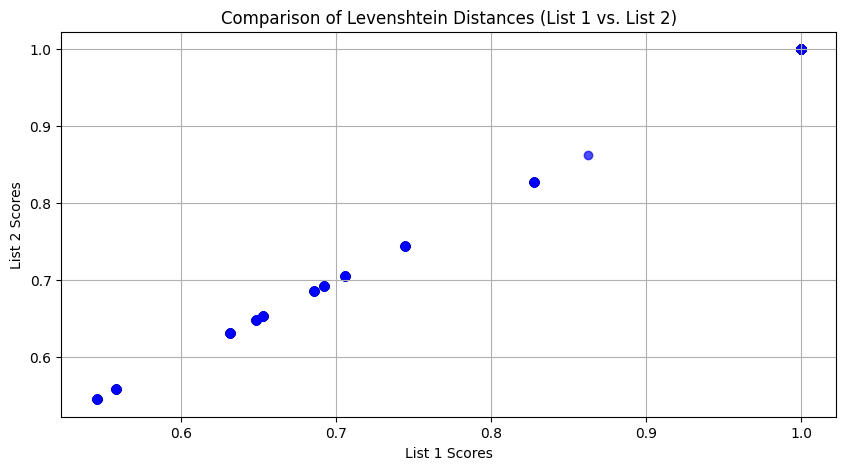

In [71]:
# Scatter
plt.figure(figsize=DIMS)
plt.scatter(scores, scores, color='blue', alpha=0.7)
plt.xlabel('List 1 Scores')
plt.ylabel('List 2 Scores')
plt.title('Comparison of Levenshtein Distances (List 1 vs. List 2)')
plt.grid(True)
plt.savefig('Graphs/Scatter Test Levenshtein Distances.png')
plt.show()

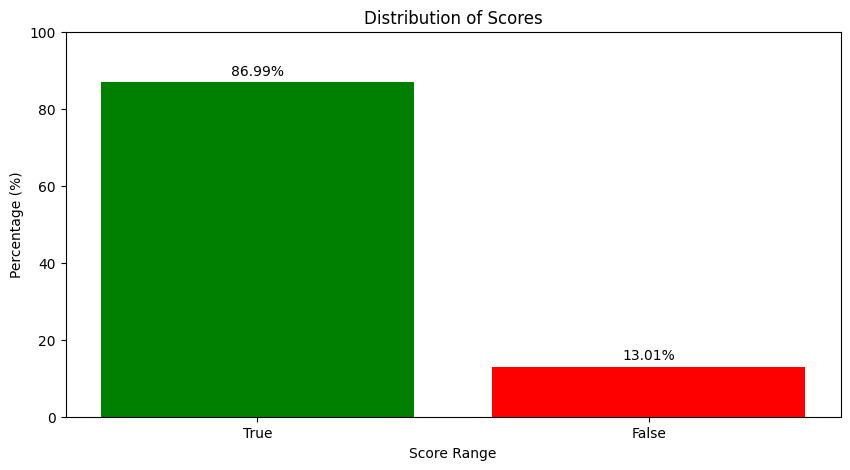

In [72]:
total_scores = len(scores)
true = sum(score >= 0.9 for score in scores)
false = total_scores - true
above_0_9_percent = (true / total_scores) * 100
below_0_9_percent = (false / total_scores) * 100
categories = ['True', 'False']
percentages = [above_0_9_percent, below_0_9_percent]

plt.figure(figsize=DIMS)
plt.bar(categories, percentages, color=['green', 'red'])
plt.xlabel('Score Range')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Scores')
plt.ylim(0, 100)
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')
plt.savefig('Graphs/Distribution Of Scores.png')
plt.show()

In [73]:
string_counts = {}
for item in true_labels:
  if item in string_counts:
    string_counts[item] += 1
  else:
    string_counts[item] = 1
string_counts

{'ilp_solver': 1431,
 'mcvlc': 1402,
 'simulated_annealing': 1432,
 'edge_coloring': 1416,
 'ecmp': 1337}

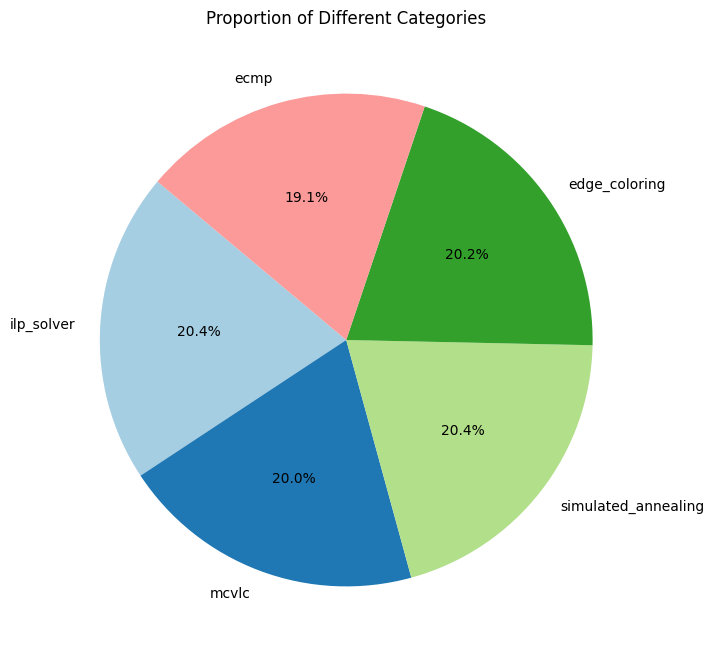

In [74]:
import matplotlib.pyplot as plt

# Data
data = string_counts
labels = list(data.keys())
values = list(data.values())

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Different Categories')
plt.savefig('Graphs/Pie Chart Of Proportion Of Different Categories.png')
plt.show()